# Data Analysis for Households Expenditure Based on Household Composition
 
## Librabries used

In [54]:
#List of imports

import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from matplotlib import pyplot

## Import CSV

In [55]:
#read csv
A23 = pd.read_csv('A23-Expenditure by household composition.csv')

print(A23['Expenditure_Category'].unique())

A23

['Food and non-alcoholic drinks' 'Alcoholic drinks, tobacco and narcotics'
 'Clothing and footwear' 'Housing (net)2, fuel and power'
 'Household goods and services' 'Health' 'Transport' 'Communication'
 'Recreation and culture' 'Education' 'Restaurants and hotels'
 'Miscellaneous goods and services' 'All expenditure groups'
 'Other expenditure items']


,Expenditure_Category,Household_Composition,Year,Expenditure
0,Food and non-alcoholic drinks,State pension one person,2015,28.6
1,Food and non-alcoholic drinks,State pension two adults,2015,51.4
2,Food and non-alcoholic drinks,Other retired one person,2015,32.3
3,Food and non-alcoholic drinks,Other retired two adults,2015,62.6
4,Food and non-alcoholic drinks,Non-retired one person,2015,29.1
...,...,...,...,...
1087,Other expenditure items,Two adults with one child,2020,102.6
1088,Other expenditure items,Two adults with two children,2020,118.5
1089,Other expenditure items,Two adults with three or more children,2020,113.9
1090,Other expenditure items,Three or more adults without children,2020,110.4


## Preprocessing

In [56]:
#Drop unused row
A23=A23[A23['Expenditure_Category'] != 'All expenditure groups']

#Replaced column values with numbers
A23 = A23.replace(['Food and non-alcoholic drinks','Alcoholic drinks, tobacco and narcotics','Clothing and footwear','Housing (net)2, fuel and power','Household goods and services','Health','Transport','Communication','Recreation and culture','Education','Restaurants and hotels','Miscellaneous goods and services','Other expenditure items'], [1,2,3,4,5,6,7,8,9,10,11,12,13])
A23 = A23.replace(['State pension one person','State pension two adults','Other retired one person','Other retired two adults','Non-retired one person','Non-retired two adults','One adult with one child','One adult with two or more children ','Two adults with one child','Two adults with two children','Two adults with three or more children','Three or more adults without children','Three or more adults with children'],[1,2,3,4,5,6,7,8,9,10,11,12,13])

#Check the data frame values
print(A23['Expenditure_Category'].unique())
print(A23['Household_Composition'].unique())
print(A23['Year'].unique())

print(A23)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[2015 2016 2017 2018 2019 2020]
      Expenditure_Category  Household_Composition  Year  Expenditure
0                        1                      1  2015         28.6
1                        1                      2  2015         51.4
2                        1                      3  2015         32.3
3                        1                      4  2015         62.6
4                        1                      5  2015         29.1
...                    ...                    ...   ...          ...
1087                    13                      9  2020        102.6
1088                    13                     10  2020        118.5
1089                    13                     11  2020        113.9
1090                    13                     12  2020        110.4
1091                    13                     13  2020        107.8

[1014 rows x 4 columns]


## Split into smaller dataframe

In [57]:
#Split the dataframe by years

A23_2015=A23[A23['Year'] == 2015]
A23_2016=A23[A23['Year'] == 2016]
A23_2017=A23[A23['Year'] == 2017]
A23_2018=A23[A23['Year'] == 2018]
A23_2019=A23[A23['Year'] == 2019]
A23_2020=A23[A23['Year'] == 2020]

In [58]:
#Split the dataframe by expenditure categories

A23_EC1=A23[A23['Expenditure_Category'] == 1]
A23_EC2=A23[A23['Expenditure_Category'] == 2]
A23_EC3=A23[A23['Expenditure_Category'] == 3]
A23_EC4=A23[A23['Expenditure_Category'] == 4]
A23_EC5=A23[A23['Expenditure_Category'] == 5]
A23_EC6=A23[A23['Expenditure_Category'] == 6]
A23_EC7=A23[A23['Expenditure_Category'] == 7]
A23_EC8=A23[A23['Expenditure_Category'] == 8]
A23_EC9=A23[A23['Expenditure_Category'] == 9]
A23_EC10=A23[A23['Expenditure_Category'] == 10]
A23_EC11=A23[A23['Expenditure_Category'] == 11]
A23_EC12=A23[A23['Expenditure_Category'] == 12]
A23_EC13=A23[A23['Expenditure_Category'] == 13]

In [60]:
#Split the dataframe by Household composition

A23_HC1=A23[A23['Household_Composition'] == 1]
A23_HC2=A23[A23['Household_Composition'] == 2]
A23_HC3=A23[A23['Household_Composition'] == 3]
A23_HC4=A23[A23['Household_Composition'] == 4]
A23_HC5=A23[A23['Household_Composition'] == 5]
A23_HC6=A23[A23['Household_Composition'] == 6]
A23_HC7=A23[A23['Household_Composition'] == 7]
A23_HC8=A23[A23['Household_Composition'] == 8]
A23_HC9=A23[A23['Household_Composition'] == 9]
A23_HC10=A23[A23['Household_Composition'] == 10]
A23_HC11=A23[A23['Household_Composition'] == 11]
A23_HC12=A23[A23['Household_Composition'] == 12]
A23_HC13=A23[A23['Household_Composition'] == 13]

## Check Outliers

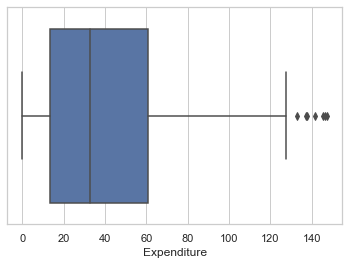

In [61]:
#Boxplot to see is there any outlier 

import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=A23["Expenditure"])

#Presence of outliers found

## Overall Visualisation

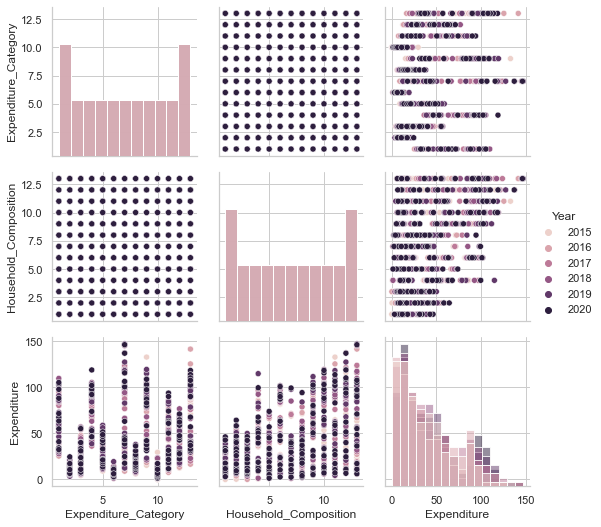

In [62]:
#Get the overall scatterplot visualisation

g = sns.PairGrid(A23, hue="Year")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(title="Year", adjust_subtitles=True)

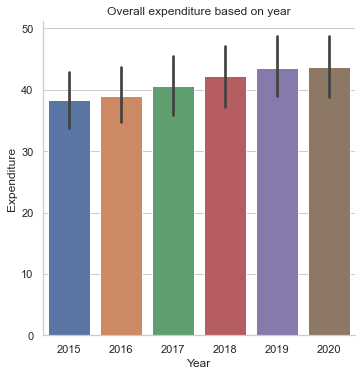

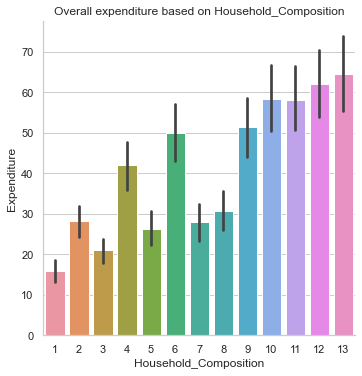

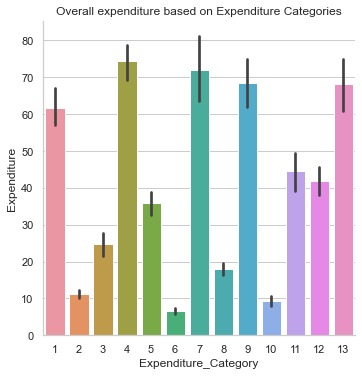

In [63]:
#Overall expenditure based on Year, Household composition and Expenditure Categories

sns.catplot(x="Year", y="Expenditure", data=A23, kind="bar").set(title="Overall expenditure based on year")

sns.catplot(x="Household_Composition", y="Expenditure", data=A23, kind="bar").set(title="Overall expenditure based on Household_Composition")

sns.catplot(x="Expenditure_Category", y="Expenditure", data=A23, kind="bar").set(title="Overall expenditure based on Expenditure Categories")

## Visualisation based on Expenditure Category

In [ ]:
#Get the line chart based on Expenditure Category

order = A23['Year']
A23_wide = A23.pivot_table(index='Year', columns='Expenditure_Category', values='Expenditure')
A23_wide = A23_wide.reindex(order, axis=0)

print(A23_wide)
sns.lineplot(data=A23_wide)
plt.show()

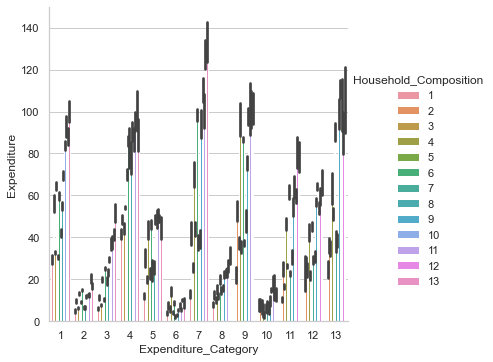

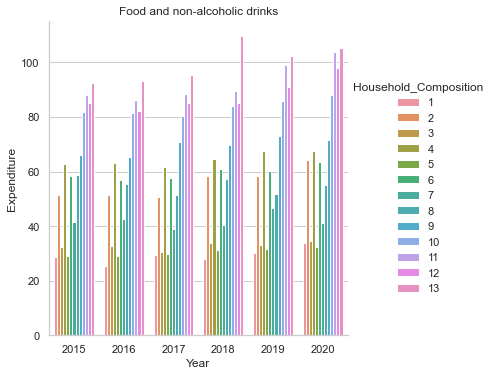

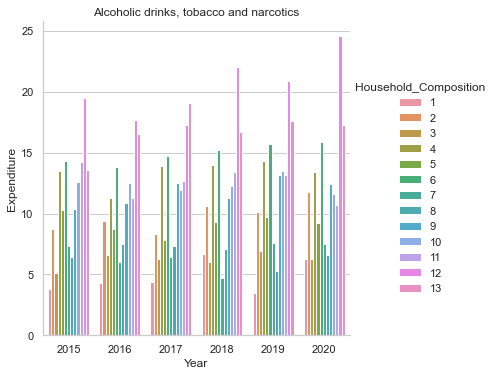

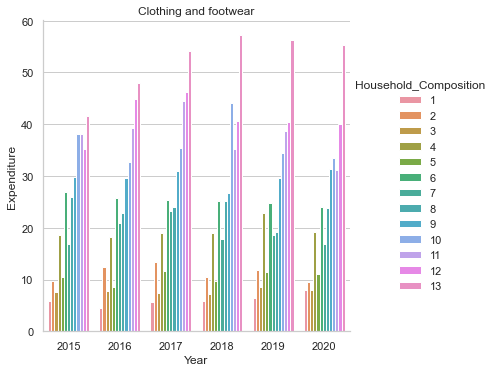

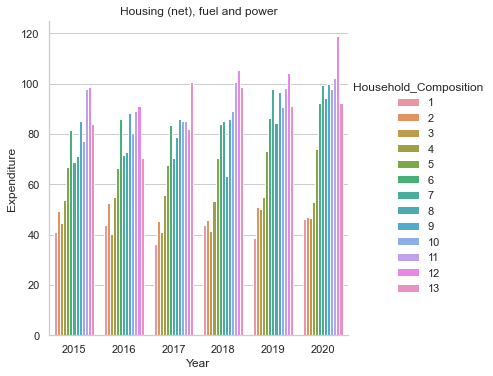

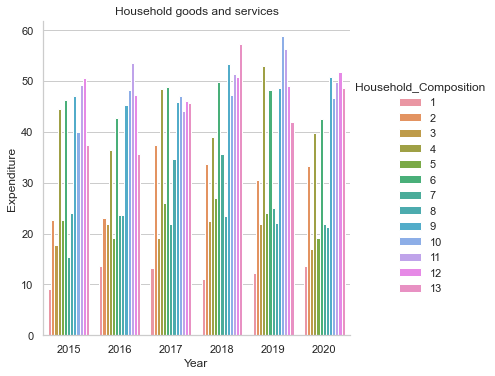

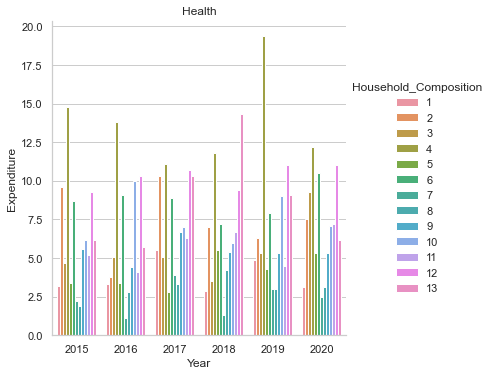

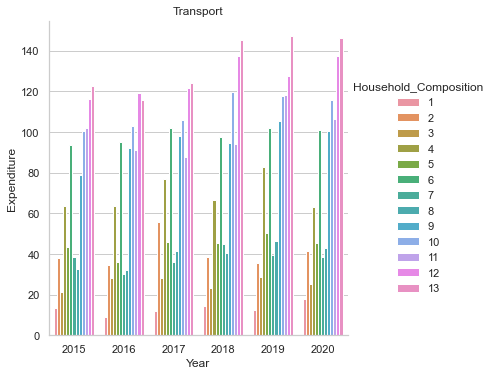

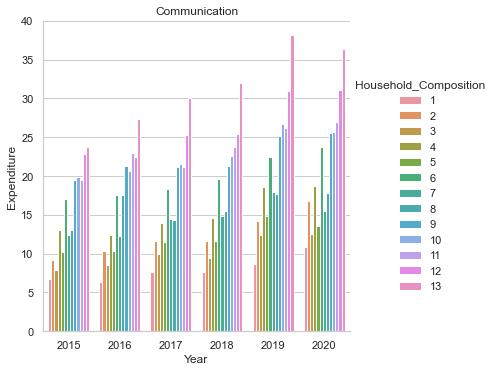

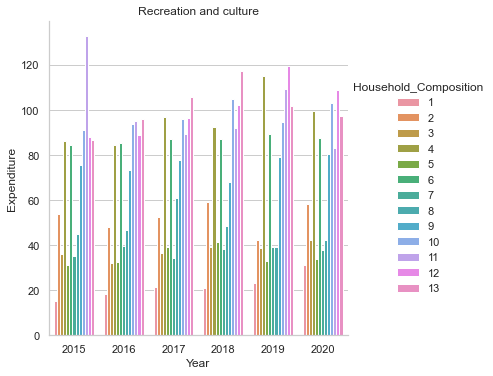

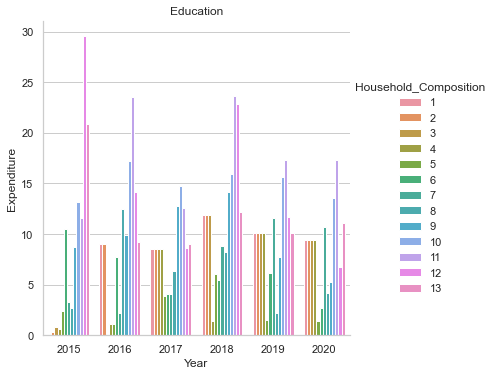

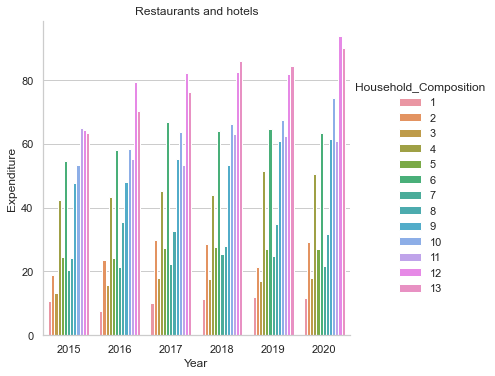

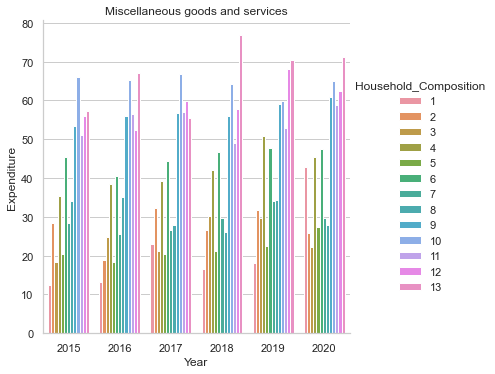

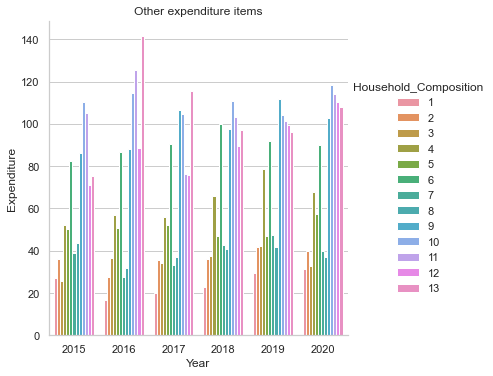

In [64]:
#Detailed Bar Charts based on expenditure category

sns.catplot(x="Expenditure_Category", y="Expenditure", hue="Household_Composition", data=A23, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC1, kind="bar").set(title='Food and non-alcoholic drinks')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC2, kind="bar").set(title='Alcoholic drinks, tobacco and narcotics')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC3, kind="bar").set(title='Clothing and footwear')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC4, kind="bar").set(title='Housing (net), fuel and power')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC5, kind="bar").set(title='Household goods and services')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC6, kind="bar").set(title='Health')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC7, kind="bar").set(title='Transport')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC8, kind="bar").set(title='Communication')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC9, kind="bar").set(title='Recreation and culture')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC10, kind="bar").set(title='Education')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC11, kind="bar").set(title='Restaurants and hotels')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC12, kind="bar").set(title='Miscellaneous goods and services')

sns.catplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23_EC13, kind="bar").set(title='Other expenditure items')

Expenditure_Category         1          2          3          4          5   \
Year                                                                          
2015                  59.692308  10.746154  23.461538  70.776923  32.815385   
2015                  59.692308  10.746154  23.461538  70.776923  32.815385   
2015                  59.692308  10.746154  23.461538  70.776923  32.815385   
2015                  59.692308  10.746154  23.461538  70.776923  32.815385   
2015                  59.692308  10.746154  23.461538  70.776923  32.815385   
...                         ...        ...        ...        ...        ...   
2020                  66.115385  11.815385  23.969231  81.853846  35.053846   
2020                  66.115385  11.815385  23.969231  81.853846  35.053846   
2020                  66.115385  11.815385  23.969231  81.853846  35.053846   
2020                  66.115385  11.815385  23.969231  81.853846  35.053846   
2020                  66.115385  11.815385  23.96923

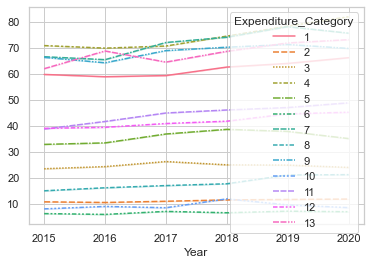

In [65]:
#Get the line chart based on Expenditure categories

order = A23['Year']
A23_wide = A23.pivot_table(index='Year', columns='Expenditure_Category', values='Expenditure')
A23_wide = A23_wide.reindex(order, axis=0)

print(A23_wide)
sns.lineplot(data=A23_wide)
plt.show()

## Visualisation based on year

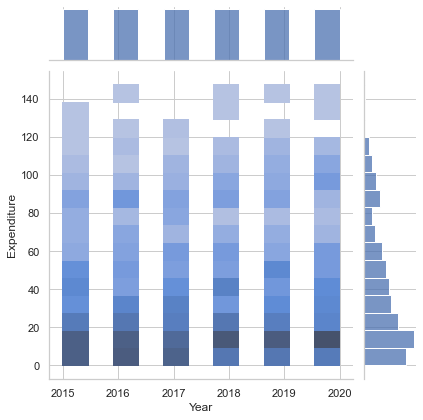

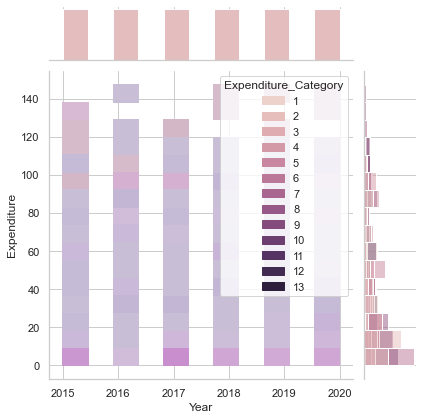

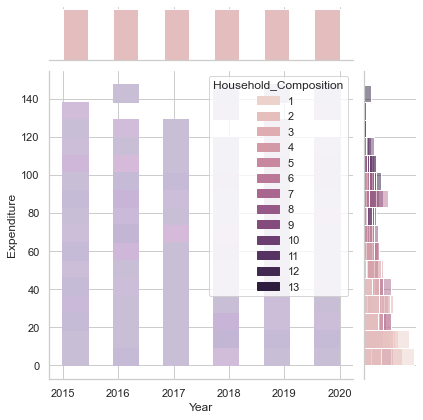

In [66]:
#Show the joint charts based on Year

sns.jointplot(x="Year", y="Expenditure", data=A23, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Household_Composition", data=A23, kind="hist")

<AxesSubplot:title={'center':'Year 2020'}, ylabel='Expenditure'>

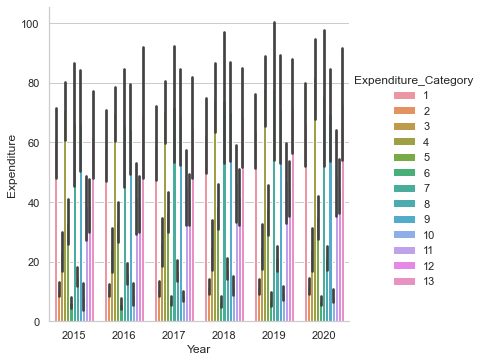

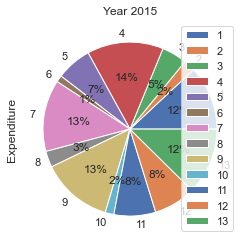

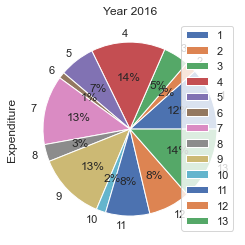

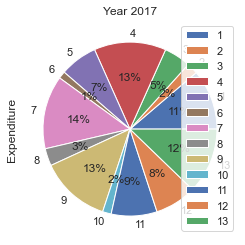

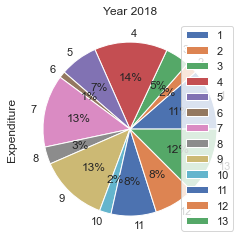

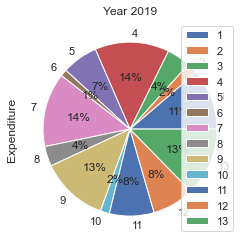

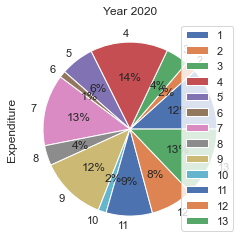

In [67]:
#Detailed Bar Charts based on expenditure categories

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23, kind="bar")

A23_2015.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2015")

A23_2016.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2016")

A23_2017.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2017")

A23_2018.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2018")

A23_2019.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2019")

A23_2020.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2020")

## Visualisation based on Household_composition

Household_Composition         1          2          3          4          5   \
Year                                                                           
2015                   13.638462  25.869231  18.107692  38.530769  25.038462   
2015                   13.638462  25.869231  18.107692  38.530769  25.038462   
2015                   13.638462  25.869231  18.107692  38.530769  25.038462   
2015                   13.638462  25.869231  18.107692  38.530769  25.038462   
2015                   13.638462  25.869231  18.107692  38.530769  25.038462   
...                          ...        ...        ...        ...        ...   
2020                   20.496154  30.357692  21.857692  43.050000  27.438462   
2020                   20.496154  30.357692  21.857692  43.050000  27.438462   
2020                   20.496154  30.357692  21.857692  43.050000  27.438462   
2020                   20.496154  30.357692  21.857692  43.050000  27.438462   
2020                   20.496154  30.357

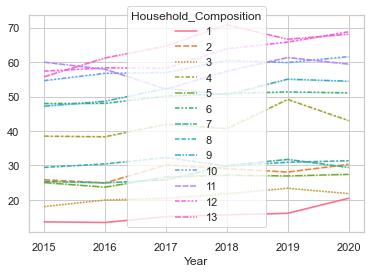

In [68]:
#Get the line chart based on Household Composition

order = A23['Year']
A23_wide = A23.pivot_table(index='Year', columns='Household_Composition', values='Expenditure')
A23_wide = A23_wide.reindex(order, axis=0)

print(A23_wide)
sns.lineplot(data=A23_wide)
plt.show()

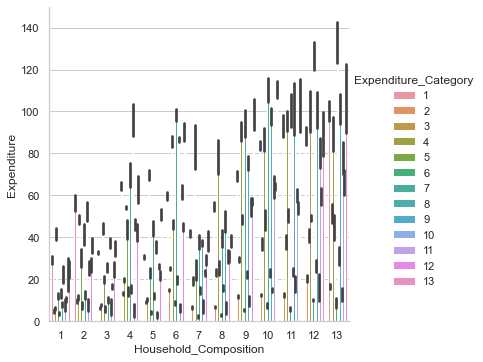

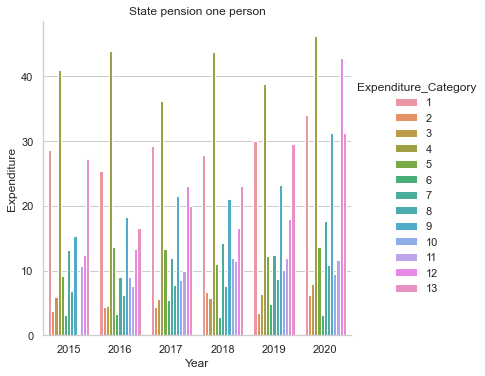

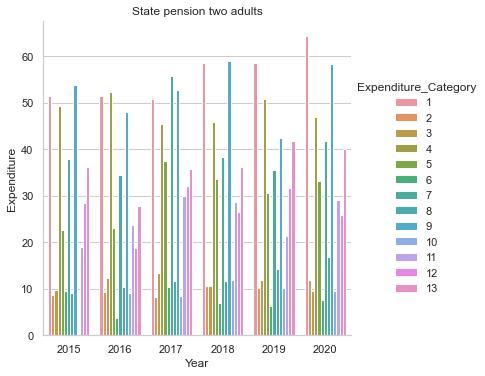

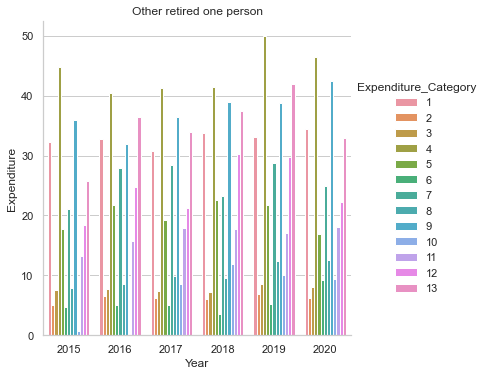

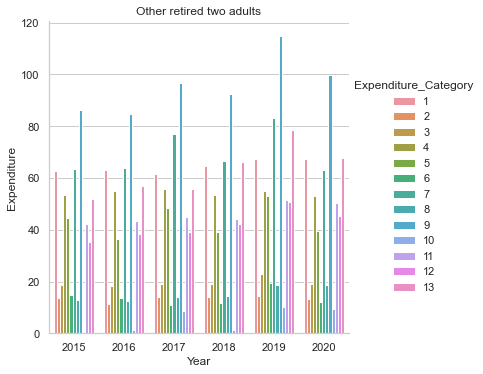

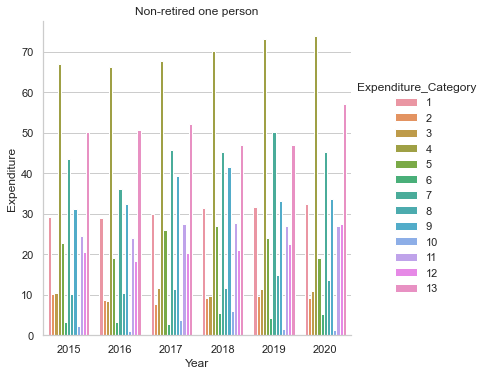

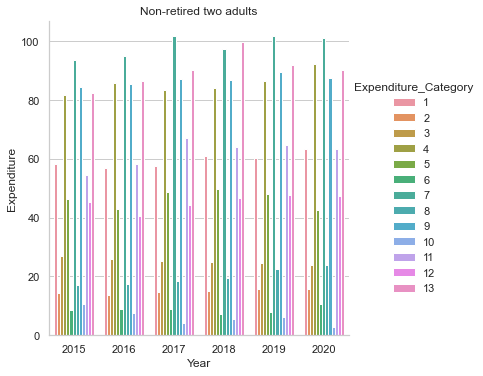

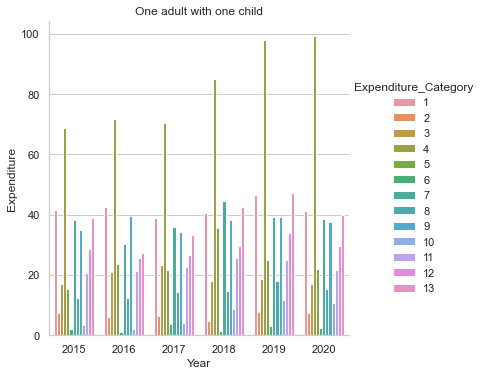

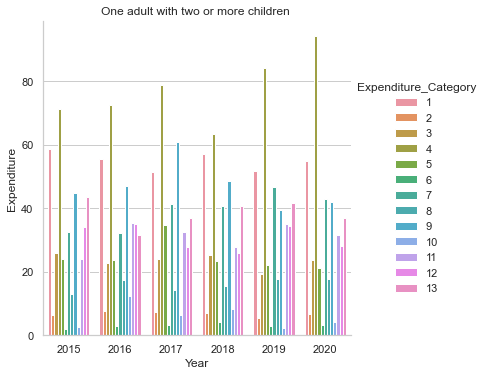

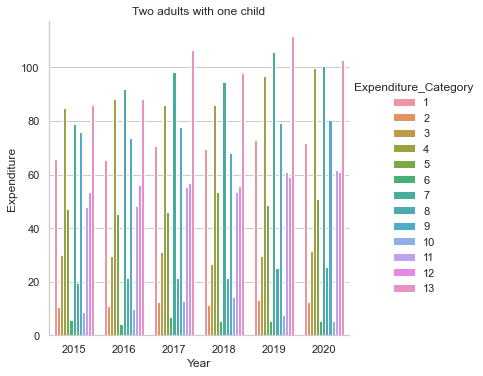

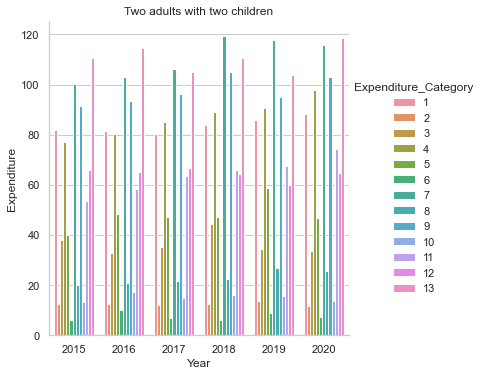

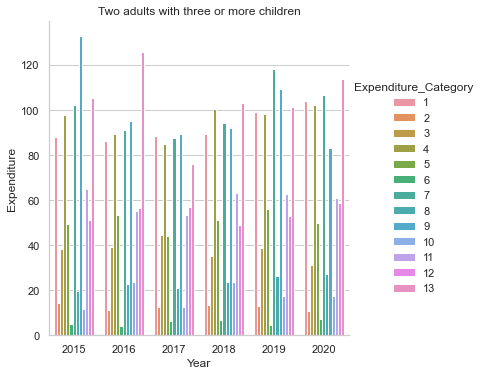

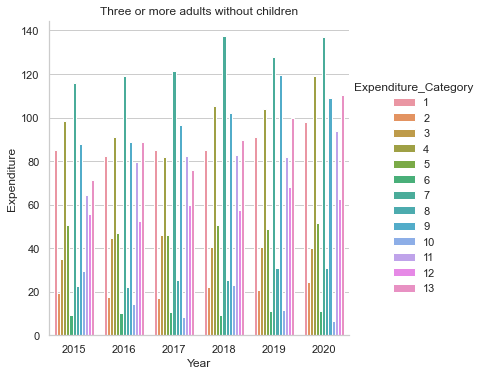

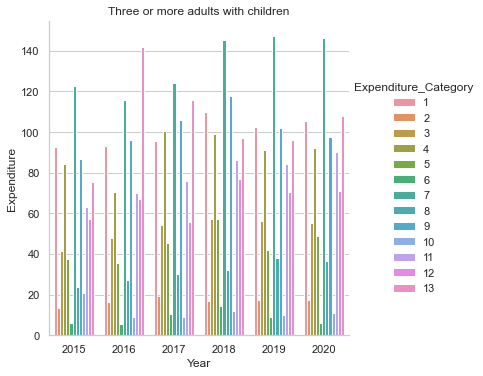

In [70]:
#Detailed Bar Charts based on Household composition

sns.catplot(x="Household_Composition", y="Expenditure", hue="Expenditure_Category", data=A23, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC1, kind="bar").set(title='State pension one person')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC2, kind="bar").set(title='State pension two adults')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC3, kind="bar").set(title='Other retired one person')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC4, kind="bar").set(title='Other retired two adults')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC5, kind="bar").set(title='Non-retired one person')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC6, kind="bar").set(title='Non-retired two adults')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC7, kind="bar").set(title='One adult with one child')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC8, kind="bar").set(title='One adult with two or more children ')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC9, kind="bar").set(title='Two adults with one child')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC10, kind="bar").set(title='Two adults with two children')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC11, kind="bar").set(title='Two adults with three or more children')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC12, kind="bar").set(title='Three or more adults without children')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A23_HC13, kind="bar").set(title='Three or more adults with children')